In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

In [2]:
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')]

In [8]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

In [9]:
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


<Axes: xlabel='count', ylabel='job_location'>

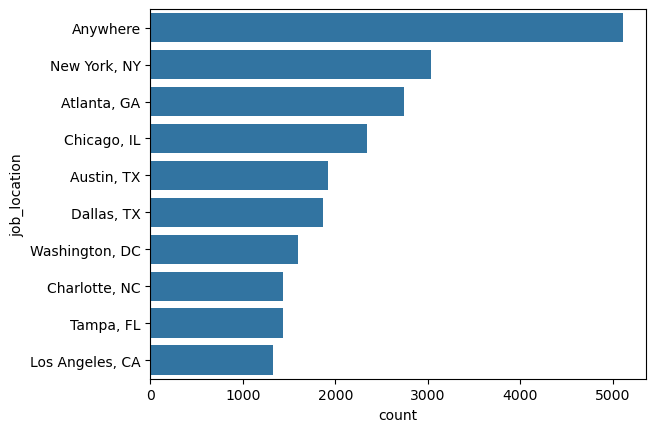

In [10]:
sns.barplot(data=df_plot, x='count', y='job_location')

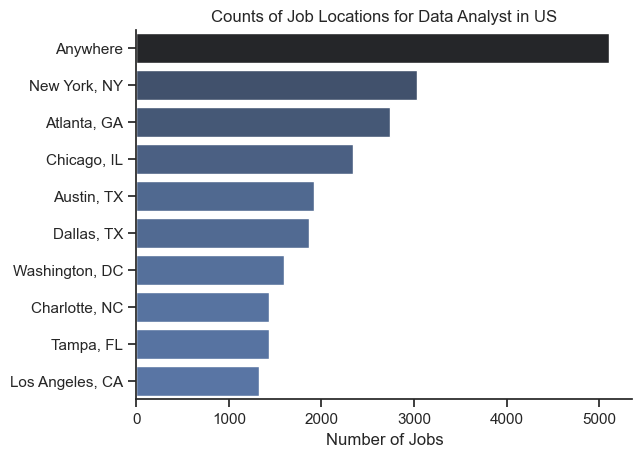

In [14]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='job_location',
            hue='count',
            palette='dark:b_r',
            legend=False)
sns.despine()   # Removes boarder
plt.title('Counts of Job Locations for Data Analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# **Pie**

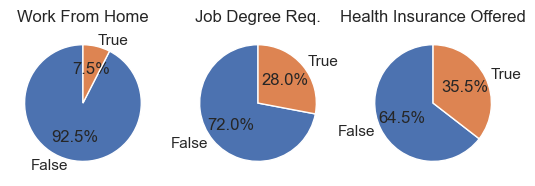

In [15]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)     # Matplotlib annotation

plt.show()

# **Exploring Companies**

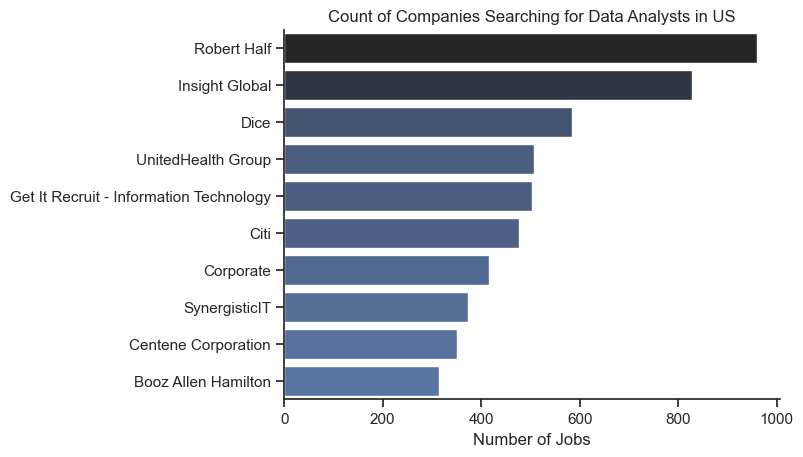

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='company_name',
            hue='count',
            palette='dark:b_r',
            legend=False)
sns.despine()
plt.title('Count of Companies Searching for Data Analysts in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()